In [314]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 2

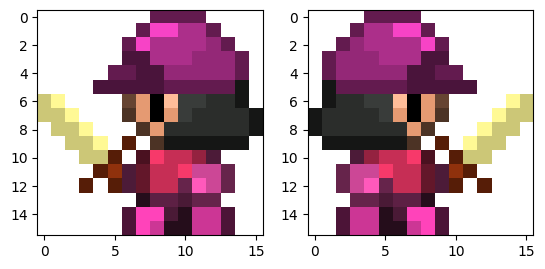

In [315]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0)
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print(sprites_with_mirrored)


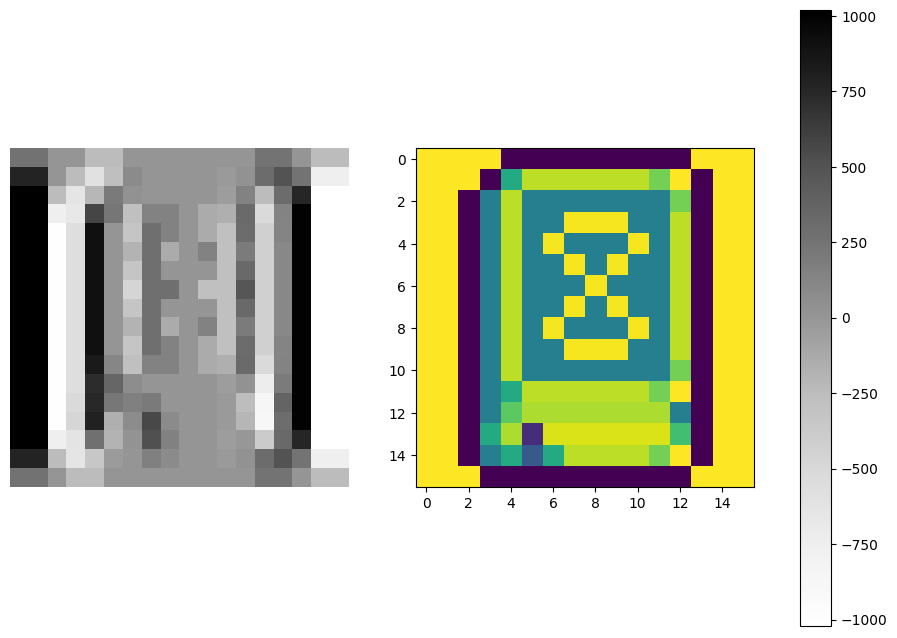

In [316]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);



In [317]:


'''
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))

'''




data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

selected_labels = data1[:894]
y = np.delete(selected_labels, slice(244, 543), axis=0)

selected_sprites = sprites1[:894]
X = np.delete(selected_sprites, slice(244, 543), axis=0)

X = X.astype(np.float32) / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)






In [318]:
model = keras.models.Sequential([
    keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)),
    #keras.layers.Conv2D(196, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)),
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

#other activations functions tried include sigmoid and different orders of relu and softmax

In [319]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[0.1765542  0.25897855 0.18002605 0.17731485 0.20712636]]


In [320]:
tf.nn.softmax(predictions).numpy()

array([[0.19526675, 0.21204339, 0.19594587, 0.19541533, 0.20132867]],
      dtype=float32)

In [321]:
loss_fn = keras.losses.CategoricalCrossentropy()


In [322]:
loss_fn(y_train[:1], predictions).numpy()

1.7146537

In [323]:
'''
loss_fn1 = keras.losses.CategoricalFocalCrossentropy()
loss_fn1(y_train[:1], predictions).numpy()
'''

#loss_fn2 = keras.losses.SparseCategoricalCrossentropy()
#loss_fn2(y_train[:2], predictions).numpy()

model.compile(optimizer='Adam', loss=loss_fn, metrics=['accuracy'])

#Tried with RMSProp, SGD, Adadelta. Adam appears to have the most acc

In [324]:
historyConv = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3866 - loss: 1.4321 - val_accuracy: 0.5462 - val_loss: 1.2486
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5846 - loss: 1.1361 - val_accuracy: 0.5882 - val_loss: 1.0283
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6325 - loss: 0.9370 - val_accuracy: 0.6218 - val_loss: 0.8728
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7083 - loss: 0.7817 - val_accuracy: 0.8487 - val_loss: 0.6613
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8602 - loss: 0.5771 - val_accuracy: 0.8655 - val_loss: 0.5012
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8594 - loss: 0.4403 - val_accuracy: 0.9160 - val_loss: 0.3671
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9162 - loss: 0.3379 - val_accuracy: 0.9160 - val_loss: 0.2634
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9439 - loss: 0.2531 - val_accuracy: 0.9412 - val_loss: 0.2008


In [325]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 49)       │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 2401)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,277 (1.78 MB)

 Trainable params: 155,425 (607.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,852 (1.19 MB)

(0.85, 1.0)

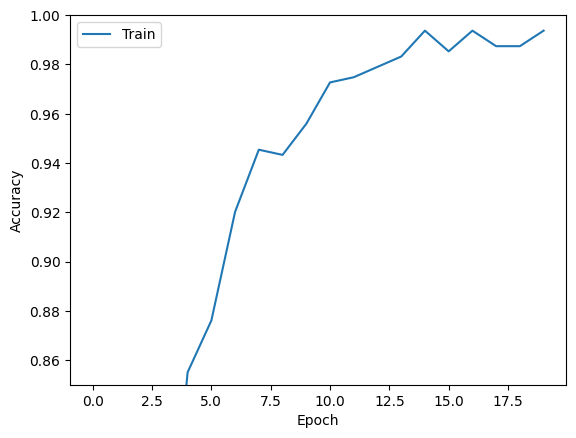

In [326]:
plt.plot(historyConv.history['accuracy'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.85, 1])

In [327]:
model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - 10ms/step - accuracy: 0.9832 - loss: 0.0425


[0.042510051280260086, 0.9831932783126831]

In [328]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.14969337, 0.14963296, 0.39839166, 0.15262474, 0.1496573 ],
       [0.15044865, 0.15027426, 0.39325577, 0.15572248, 0.15029885],
       [0.1488477 , 0.148848  , 0.14884779, 0.4046088 , 0.14884771],
       [0.14884786, 0.14884862, 0.14884798, 0.4046076 , 0.14884791],
       [0.15483238, 0.3637282 , 0.15639406, 0.17024562, 0.15479982]],
      dtype=float32)>

In [329]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=118), Output()), _dom_classes=('widge…